In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from verstack import NaNImputer

import warnings
warnings.filterwarnings("ignore")

### Load data

In [63]:
train = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Customer-Churn-Prediction-and-Analysis/main/Data/train.csv")
train.sample(5, random_state=42)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
9550,fffe43004900440033003200320035003600,Tobias Liebold,24,F,I4AYTC2,City,Premium Membership,2015-04-22,No,xxxxxxxx,...,101.50,32593.20,15.0,801.18,Yes,No,No,Not Applicable,Products always in Stock,1
7112,fffe43004900440032003200350035003400,Patrick Kizer,53,F,WV0LB6W,Town,Silver Membership,2016-01-19,No,xxxxxxxx,...,324.61,39155.49,21.0,NaN,No,Yes,No,Not Applicable,No reason specified,3
9545,fffe43004900440031003000380038003300,Annamaria Freese,53,F,94O1F22,Town,No Membership,2016-02-07,Yes,CID19334,...,47.71,35434.17,12.0,675.17,Yes,No,No,Not Applicable,Poor Product Quality,5
10261,fffe43004900440034003200300031003800,Gilda Lundy,61,M,74WFG9K,NaN,Gold Membership,2017-10-24,No,xxxxxxxx,...,451.66,30621.93,7.0,755.93,Yes,Yes,Yes,Solved,Poor Product Quality,3
9876,fffe43004900440034003100380030003300,Angla Alameda,46,F,249HVEX,Town,Premium Membership,2016-06-11,No,xxxxxxxx,...,266.68,50462.15,Error,806.67,Yes,Yes,Yes,Solved,Products always in Stock,1


### Create a copy for cleaning

In [64]:
train_copy = train.copy()

### Investigate the dataset

In [65]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [66]:
train_copy.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [67]:
train_copy['churn_risk_score'].value_counts()

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

## Data cleaning

#### Handling negative values

In [68]:
train_copy.loc[train_copy['days_since_last_login'] < 0, 'days_since_last_login'] = np.nan
train_copy.loc[train_copy['avg_time_spent'] < 0, 'avg_time_spent'] = np.nan
train_copy.loc[train_copy['points_in_wallet'] < 0, 'points_in_wallet'] = np.nan
train_copy.loc[train_copy['churn_risk_score'] == -1, 'churn_risk_score'] = np.nan

In [69]:
train_copy.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,34993.000000,35273.000000,36992.000000,33413.000000,35829.000000
mean,37.118161,12.758552,292.751466,29271.194003,690.354685,3.608278
std,15.867412,5.572600,331.946382,19444.806226,186.426973,1.176426
min,10.000000,1.000000,1.837399,800.460000,6.432208,1.000000
25%,23.000000,9.000000,71.560000,14177.540000,617.260000,3.000000
50%,37.000000,13.000000,174.180000,27554.485000,698.250000,4.000000
75%,51.000000,17.000000,371.160000,40855.110000,764.260000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


#### Visualizing distributions

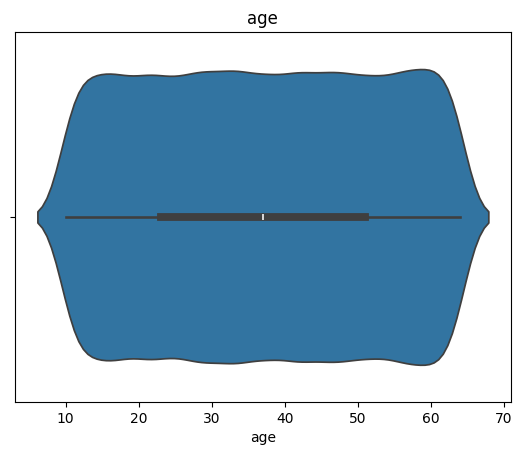

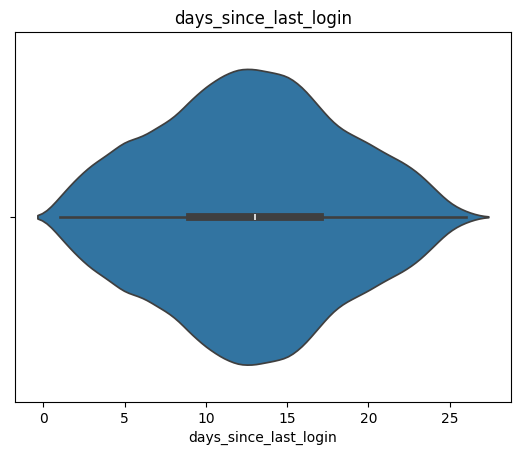

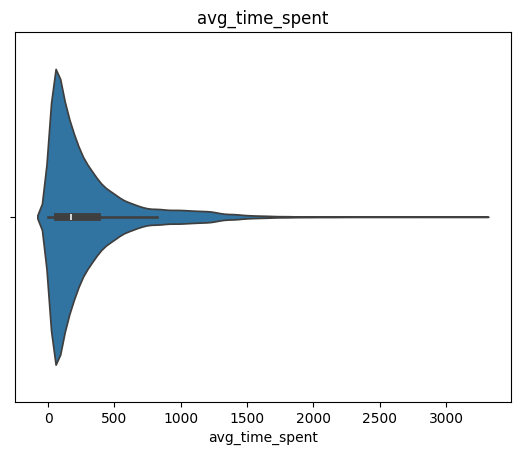

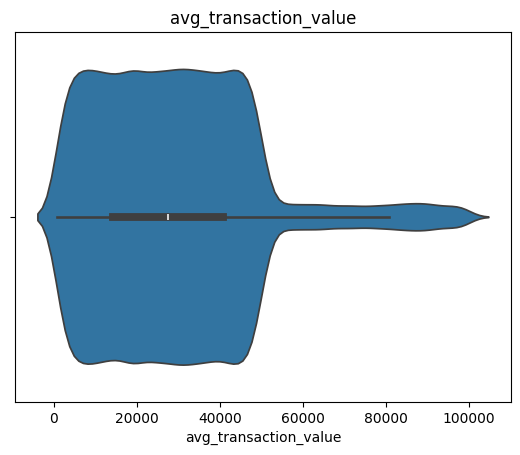

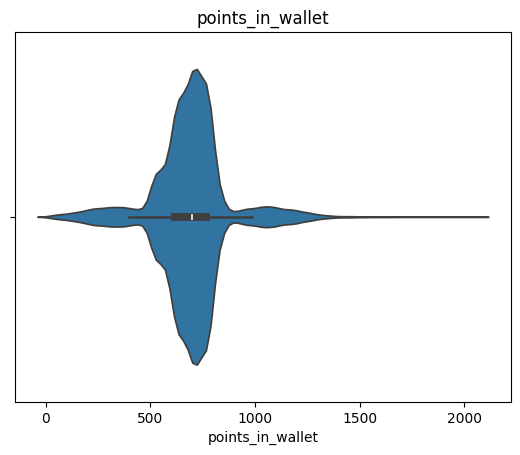

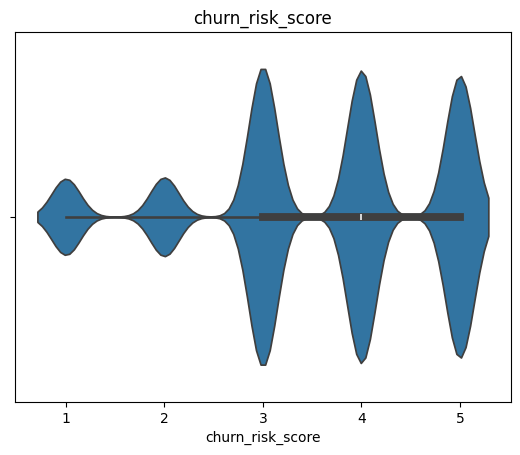

In [70]:
for col in train_copy.describe().columns:
	sns.violinplot(train_copy, x=col)
	plt.title(col)
	plt.show()

In [71]:
# cols_with_outliers = ['avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

Some columns have non-normal and non-uniform distributions. Also, they have outliers; however, I will not cap these outliers because they may introduce an important pattern in the data, for example, if `avg_transaction_value` has some very high values due to VIP customers, capping them may remove valuable patterns.

So, I will apply log transformation to `avg_time_spent` to make it look more normal as it's right-skewed.

#### Log transformation

In [72]:
# log1p(x) = log(x + 1): this avoids errors when x = 0
train_copy['log_avg_time_spent'] = np.log1p(train_copy['avg_time_spent'])

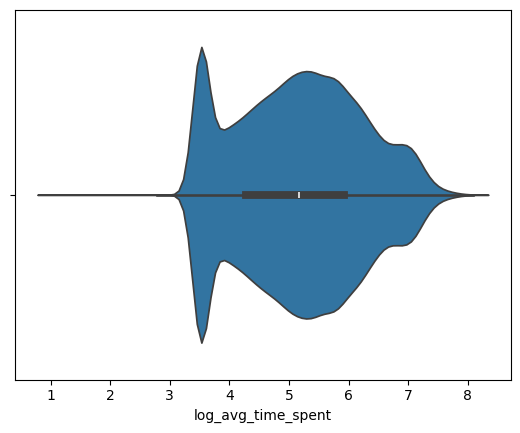

In [73]:
sns.violinplot(train_copy, x='log_avg_time_spent')
plt.show()

### Check duplicates

In [74]:
train_copy.duplicated(['customer_id']).sum()

0

### Handling missing values 

In [75]:
for col in train_copy.select_dtypes(include='object').columns:
	print(train_copy[col].value_counts(normalize=True, dropna=False))
	print('-'*50)

customer_id
fffe4300490044003600300030003800        0.000027
fffe43004900440033003400330032003000    0.000027
fffe43004900440032003300340031003500    0.000027
fffe43004900440035003300380031003700    0.000027
fffe43004900440031003800300034003500    0.000027
                                          ...   
fffe43004900440034003900380033003700    0.000027
fffe43004900440031003400330031003900    0.000027
fffe43004900440032003900340031003700    0.000027
fffe43004900440033003100350038003400    0.000027
fffe43004900440033003600340034003200    0.000027
Name: proportion, Length: 36992, dtype: float64
--------------------------------------------------
Name
Pattie Morrisey     0.000027
Brandon Casiano     0.000027
Merideth Gebo       0.000027
Neville Goodwill    0.000027
Sol Siemers         0.000027
                      ...   
Gina Hintzen        0.000027
Kizzy Ramos         0.000027
Earlie Spalla       0.000027
Vinnie Talley       0.000027
Verlene Beaulieu    0.000027
Name: proportion, Length: 

In [76]:
# drop 'avg_frequency_login_days' because most of it is missing
cols_to_drop = ['customer_id', 'Name', 'security_no', 'referral_id', 'avg_frequency_login_days']

# date_cols = [('date', 'date_format'), ...]
date_cols = [('joining_date', '%Y-%m-%d'), ('last_visit_time', '%H:%M:%S')]

### Sanity check

`referral_id` should be populated only when `joined_through_referral` is "Yes"

In [77]:
train_copy['referral_id'].isna().sum()

0

In [78]:
# TODO: There're lots of columns seems to have inconsistent data; how to deal with them?!
wrong_rows = ((train_copy['referral_id'] != 'xxxxxxxx') & (train_copy['joined_through_referral'] == 'No')) | \
				((train_copy['referral_id'] == 'xxxxxxxx') & (train_copy['joined_through_referral'] == 'Yes'))
train_copy.loc[wrong_rows]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,log_avg_time_spent
23,fffe43004900440032003300320035003700,Iliana Gagnier,48,M,GX2SOJ5,Town,Basic Membership,2017-11-10,Yes,xxxxxxxx,...,15860.41,3.2073857931601104,529.03,No,Yes,No,Not Applicable,No reason specified,NaN,4.297557
54,fffe43004900440033003800370031003800,Zelda Labombard,43,M,KJLXRJ7,Town,Premium Membership,2017-04-26,Yes,xxxxxxxx,...,9091.94,20.0,700.40,No,Yes,No,Not Applicable,Poor Product Quality,3.0,6.652644
83,fffe43004900440034003700390034003800,Xenia Kibby,54,M,KUJNEI7,NaN,Basic Membership,2015-08-07,Yes,xxxxxxxx,...,11345.66,7.0,572.41,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,5.0,5.544083
103,fffe43004900440036003000360031003000,Sid Basel,49,F,80X3LBS,Town,Premium Membership,2016-09-02,Yes,xxxxxxxx,...,41156.81,27.0,741.02,No,Yes,No,Not Applicable,Poor Customer Service,3.0,4.757118
114,fffe4300490044003700350032003900,Melinda Tullius,26,M,ELWT1XG,City,Silver Membership,2017-11-14,Yes,xxxxxxxx,...,17002.23,11.0,700.11,No,Yes,No,Not Applicable,Too many ads,3.0,5.241271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36919,fffe43004900440031003200330036003100,Danny Rodriques,35,M,JLZ2E95,Village,No Membership,2015-08-27,Yes,xxxxxxxx,...,18097.99,17.0,672.83,Yes,No,No,Not Applicable,Poor Customer Service,4.0,6.419897
36926,fffe43004900440033003200350033003000,Joyce Robards,59,F,0PQQ85C,City,Basic Membership,2017-12-11,Yes,xxxxxxxx,...,14831.98,Error,682.34,Yes,No,No,Not Applicable,Poor Customer Service,5.0,4.051959
36939,fffe43004900440035003200300030003900,Christiana Troyer,54,F,P2ETOZR,Town,Platinum Membership,2015-03-29,Yes,xxxxxxxx,...,7346.05,13.0,NaN,No,Yes,Yes,Solved,Poor Website,3.0,3.601686
36945,fffe43004900440034003400350033003700,Elden Lecompte,64,M,2J86HFW,Town,Gold Membership,2015-04-25,Yes,xxxxxxxx,...,29127.95,29.0,727.13,Yes,No,No,Not Applicable,Poor Customer Service,3.0,3.503453


I prefer to not remove them because first we need to go back the data owners and ask them what it means when 'referral_id' is equal to 'xxxxxxxx'. 

### Drop unnecessary cols


In [79]:
train_copy = train_copy.drop(columns=cols_to_drop)

In [80]:
cat_cols = list(set(train_copy.select_dtypes(include='object').columns) - set(date_cols))
# last_visit_time → categories: morning & evening, ...
cat_cols

['past_complaint',
 'preferred_offer_types',
 'joined_through_referral',
 'gender',
 'membership_category',
 'internet_option',
 'used_special_discount',
 'complaint_status',
 'feedback',
 'last_visit_time',
 'offer_application_preference',
 'medium_of_operation',
 'joining_date',
 'region_category']

#### Set unknown categories to `Nan`

In [81]:
# train_copy.loc[train_copy['joined_through_referral']=='?', 'joined_through_referral'] = np.nan
# train_copy.loc[train_copy['medium_of_operation']=='?', 'medium_of_operation'] = np.nan
train_copy = train_copy.replace('?', np.nan)

#### Identify missing values

In [82]:
train_copy.isna().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login           1999
avg_time_spent                  1719
avg_transaction_value              0
points_in_wallet                3579
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                1163
log_avg_time_spent              1719
dtype: int64

- Drop rows where target variable is missing

In [83]:
train_copy = train_copy.drop(train_copy.loc[train_copy['churn_risk_score'].isna()].index)

-	Check remaining columns with Nans

In [84]:
train_copy.isna().sum()

age                                0
gender                             0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral         5292
preferred_offer_types            276
medium_of_operation             5230
internet_option                    0
last_visit_time                    0
days_since_last_login           1944
avg_time_spent                  1659
avg_transaction_value              0
points_in_wallet                3475
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
log_avg_time_spent              1659
dtype: int64

##### **Handling missing value approach**

I will use `verstack.NaNImputer` for powerful model-based imputation

## Building the whole pipeline

### DataCleaner Transformer

This transformer:

-	drops unwanted cols

-	replace unknown categories (e.g., '?') with `np.nan`

-	handle wrong negative values 

In [85]:
class DataCleaner(BaseEstimator, TransformerMixin):
	def __init__(self, cols_to_drop):
		self.cols_to_drop = cols_to_drop
   
	def fit(self, X, y=None):
		return self

	# X is pd.DataFrame
	def transform(self, X):
		X_copy = X.copy()
		X_copy.drop(columns=self.cols_to_drop, inplace=True)	
			
		X_copy.replace("?", np.nan, inplace=True)

		for col in ['days_since_last_login', 'avg_time_spent', 'points_in_wallet']:
			X_copy.loc[X_copy[col] < 0, col] = np.nan  

		return X_copy

####  Wrapping `verstack.NaNImputer` into an custom transformer for compatibility with scikit-learn's API

In [86]:
class NaNImputerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, train_sample_size=30_000, verbose=True):
        self.train_sample_size = train_sample_size
        self.verbose = verbose
        self.imputer = NaNImputer(self.train_sample_size, self.verbose)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.imputer.impute(X)

### Integrating transformers into a pipeline

In [94]:
train.loc[train['churn_risk_score'] == -1, 'churn_risk_score'] = np.nan
train = train.dropna(subset=['churn_risk_score'])

In [95]:
X_train = train.drop(columns=['churn_risk_score'])
y_train = train['churn_risk_score']

In [96]:
cleaning_pipeline = Pipeline([
    ('dataCleaner', DataCleaner(cols_to_drop)), 
    ('imputer', NaNImputerWrapper(train_sample_size=train.shape[0]))
])

X_train_cleaned = cleaning_pipeline.fit_transform(X_train)


 * Initiating NaNImputer.impute
     . Dataset dimensions:
     .. rows:         35829
     .. columns:      19
     .. mb in memory: 5.47
     .. NaN cols num: 7

   - Drop hopeless NaN cols

   - Processing whole data for imputation
     . Processed 10 cols; 7 to go

   - Imputing single core 7 cols
     . Imputed (multiclass) - 5263     NaN in region_category
     . Imputed (  binary  ) - 5292     NaN in joined_through_referral
     . Imputed (multiclass) - 276      NaN in preferred_offer_types
     . Imputed (multiclass) - 5230     NaN in medium_of_operation
     . Imputed (multiclass) - 1944     NaN in days_since_last_login
     . Imputed (regression) - 1659     NaN in avg_time_spent
     . Imputed (regression) - 3475     NaN in points_in_wallet

   - Missing values after imputation: 0

Time elapsed for impute execution: 31.78069 seconds


In [97]:
X_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35829 entries, 0 to 36991
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35829 non-null  object 
 2   region_category               35829 non-null  object 
 3   membership_category           35829 non-null  object 
 4   joining_date                  35829 non-null  object 
 5   joined_through_referral       35829 non-null  object 
 6   preferred_offer_types         35829 non-null  object 
 7   medium_of_operation           35829 non-null  object 
 8   internet_option               35829 non-null  object 
 9   last_visit_time               35829 non-null  object 
 10  days_since_last_login         35829 non-null  float64
 11  avg_time_spent                35829 non-null  float64
 12  avg_transaction_value         35829 non-null  float64
 13  points

### Save cleaned data

In [98]:
train_cleaned = pd.concat([X_train_cleaned, y_train], axis=1)
train_cleaned.to_csv('train_cleaned.csv', index=False)